In [24]:
# Load libraries
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [5]:
data = [] 
target = []

with open('cmc.data') as file:
    for line in file: 
        arry = line.strip().split(",")
        data.append(arry[:-1])
        target.append(arry[-1])
data = np.array(data)
data = data.astype(np.float)
target = np.array(target)
target = target.astype(np.float)
print(data.shape,target.shape)

(1473, 9) (1473,)


In [6]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(data, target, test_size=0.2)
print (X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(1178, 9) (295, 9) (1178,) (295,)


In [18]:
#DecisionTreeClassifier

#aplicando verificação cruzada dos parâmetros max_depth e max_features *foram os compreendidos*

#redividindo a base de testes em validação e testes
X_val_train, X_val, Y_val_train, Y_val = model_selection.train_test_split(X_train, Y_train, test_size=0.1)

#max_depth
D = [2, 3, 5, None] #máxima profundidade da árvore, se none, divide até o limite mínimo de instâncias no nó *min_samples_split*
#max_features
F = ['auto', 'sqrt', 'log2', None] #forma como os atributos são vistos quando da divisão e distribuição deles na árvore

best = 0.0

for d in D:
    for f in F:
        dtree = DecisionTreeClassifier(max_depth = d, max_features = f)
        dtree.fit(X_val_train, Y_val_train)
        pred = dtree.predict(X_val)
        
        value = accuracy_score(Y_val, pred)

        if value > best: 
            best = value
            i = d
            j = f
#declaração, treino, teste
dtree_classifier = DecisionTreeClassifier(max_depth = i, max_features = j)
dtree_classifier.fit(X_train, Y_train)
dtree_pred = dtree_classifier.predict(X_test)

#aplicando métricas
dtree_microf1 = f1_score(Y_test, dtree_pred, average='micro')
dtree_macrof1 = f1_score(Y_test, dtree_pred, average='macro')
dtree_accuracy = accuracy_score(Y_test, dtree_pred)
print(dtree_microf1, dtree_macrof1, dtree_accuracy)

0.5016949152542373 0.49097841156664684 0.5016949152542373


In [20]:
#NaiveBayes : GaussianNB

#não necessita de parâmetros
bayes_classifier = GaussianNB()
bayes_classifier.fit(X_train, Y_train) #treinando

bayes_pred = bayes_classifier.predict(X_test) #na classe de teste, tento classificar corretamente a parcela de teste

#aplicando métricas
bayes_microf1 = f1_score(Y_test, bayes_pred, average='micro')
bayes_macrof1 = f1_score(Y_test, bayes_pred, average='macro')
bayes_accuracy = accuracy_score(Y_test, bayes_pred)
print(bayes_microf1, bayes_macrof1, bayes_accuracy)

0.46440677966101696 0.46471108931043137 0.46440677966101696


In [21]:
#LogisticRegression

#utilizando parâmetros padrões por questões de simplicidade
lgt_reg = LogisticRegression()
lgt_reg.fit(X_train, Y_train) #treinando

lgt_pred = lgt_reg.predict(X_test) #na classe de teste, tento classificar corretamente a parcela de teste

#aplicando métricas
lgt_microf1 = f1_score(Y_test, lgt_pred, average='micro')
lgt_macrof1 = f1_score(Y_test, lgt_pred, average='macro')
lgt_accuracy = accuracy_score(Y_test, lgt_pred)
print(lgt_microf1, lgt_macrof1, lgt_accuracy)

0.49491525423728816 0.4630398671096345 0.49491525423728816


In [32]:
#plotando resultados
np.Comparacao=[[dtree_microf1,dtree_macrof1,dtree_accuracy],[bayes_microf1,bayes_macrof1,bayes_accuracy],[lgt_microf1,lgt_macrof1,lgt_accuracy]]

In [30]:
base = pd.DataFrame(np.Comparacao, index=('Árvore de decisão' , 'Gaussian Naive Bayes', 'Logistic Regression'), columns=('Micro-F1', 'Macro-F1', 'Acurácia'))

In [26]:
np.Comparacao

[[0.5016949152542373, 0.49097841156664684, 0.5016949152542373],
 [0.46440677966101696, 0.46471108931043137, 0.46440677966101696],
 [0.49491525423728816, 0.4630398671096345, 0.49491525423728816]]

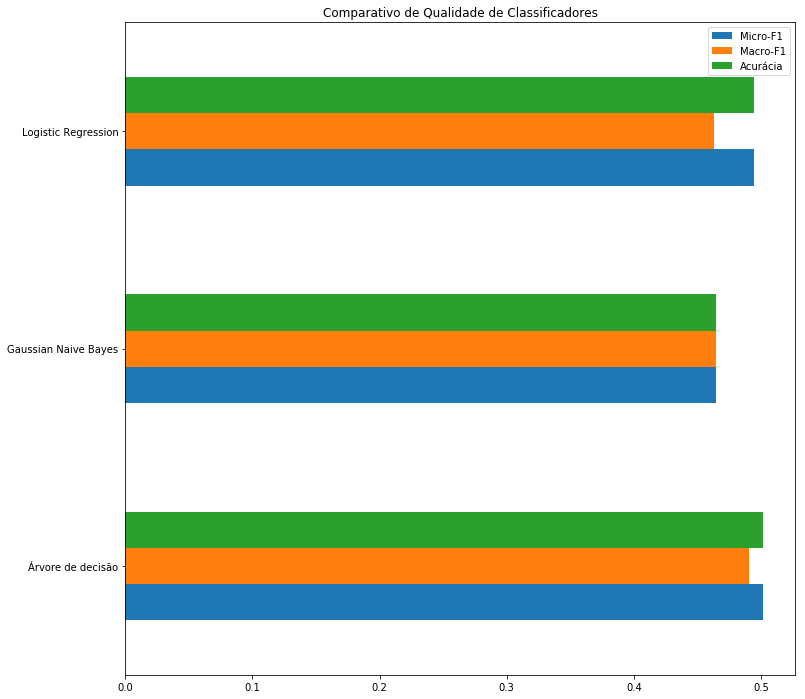

In [31]:
base.plot(kind='barh', figsize=(12,12), title='Comparativo de Qualidade de Classificadores')